<a href="https://colab.research.google.com/github/NexPG/first_project_case/blob/main/test_push.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Этап 1. Понимание задачи и знакомство с данными

Мы решаем задачу бинарной классификации - предсказать, уйдёт ли клиент из банка или останется. Это классическая задача прогнозирования оттока клиентов (churn prediction), которая имеет высокую практическую ценность для бизнеса.

## 1. Импорт библиотек. Размер данных и общая информация

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Загрузка данных
df = pd.read_csv('train.csv')

# Базовая информация о данных
print("=" * 50)
print("БАЗОВАЯ ИНФОРМАЦИЯ О ДАННЫХ")
print("=" * 50)

print(f"Размер данных: {df.shape[0]} строк, {df.shape[1]} столбцов")
print(f"\nПервые 5 строк:")
display(df.head())

БАЗОВАЯ ИНФОРМАЦИЯ О ДАННЫХ
Размер данных: 165034 строк, 14 столбцов

Первые 5 строк:


,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0


Размер данных
*   1424 строки (записи о клиентах)
*   14 столбцов (признаков)

## 2. Типы данных и пропущенные значения

In [ ]:
print("\nИнформация о типах данных:")
print("=" * 30)
df.info()

print("\nПропущенные значения:")
print("=" * 20)
missing_data = df.isnull().sum()
print(missing_data[missing_data > 0])


Информация о типах данных:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165034 entries, 0 to 165033
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               165034 non-null  int64  
 1   CustomerId       165034 non-null  int64  
 2   Surname          165034 non-null  object 
 3   CreditScore      165034 non-null  int64  
 4   Geography        165034 non-null  object 
 5   Gender           165034 non-null  object 
 6   Age              165034 non-null  float64
 7   Tenure           165034 non-null  int64  
 8   Balance          165034 non-null  float64
 9   NumOfProducts    165034 non-null  int64  
 10  HasCrCard        165034 non-null  float64
 11  IsActiveMember   165034 non-null  float64
 12  EstimatedSalary  165034 non-null  float64
 13  Exited           165034 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 17.6+ MB

Пропущенные значения:
Series([], dtype: int64

Отличное качество данных:
*   Нет пропущенных значений во всех столбцах
*   Нет дубликатов по идентификаторам (id и CustomerId)
*   Все типы данных соответствуют ожидаемым

## 3. Статистика по целевой переменной (Exited)

Целевая переменная - столбец Exited:
*   **`0`** - клиент остался
*   **`1`** - клиент ушёл


РАСПРЕДЕЛЕНИЕ ЦЕЛЕВОЙ ПЕРЕМЕННОЙ (Exited)
Клиенты остались (0): 130113 (78.8%)
Клиенты ушли (1): 34921 (21.2%)


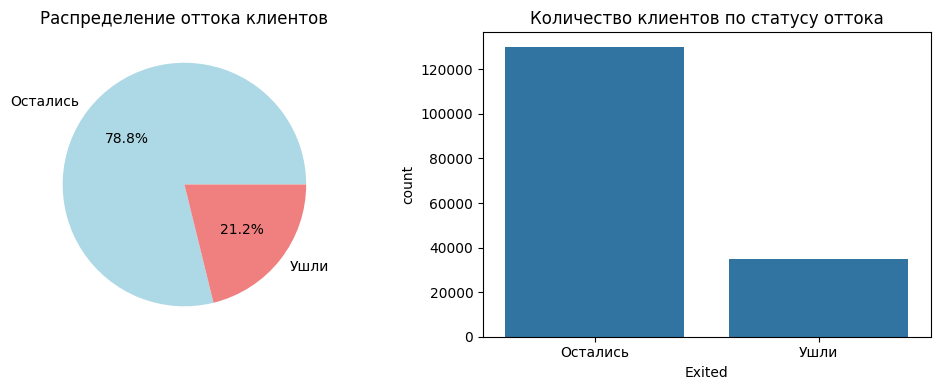

In [ ]:
print("\nРАСПРЕДЕЛЕНИЕ ЦЕЛЕВОЙ ПЕРЕМЕННОЙ (Exited)")
print("=" * 45)

exited_counts = df['Exited'].value_counts()
exited_percent = df['Exited'].value_counts(normalize=True) * 100

print(f"Клиенты остались (0): {exited_counts[0]} ({exited_percent[0]:.1f}%)")
print(f"Клиенты ушли (1): {exited_counts[1]} ({exited_percent[1]:.1f}%)")

# Визуализация
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.pie(exited_counts.values, labels=['Остались', 'Ушли'], autopct='%1.1f%%', colors=['lightblue', 'lightcoral'])
plt.title('Распределение оттока клиентов')

plt.subplot(1, 2, 2)
sns.countplot(data=df, x='Exited')
plt.title('Количество клиентов по статусу оттока')
plt.xticks([0, 1], ['Остались', 'Ушли'])

plt.tight_layout()
plt.show()

## Визуализация и интерпретация:
Круговая диаграмма:
*   Наглядно показывает сильный дисбаланс классов
*   Большинство клиентов остаются с банком
*   Только каждый пятый клиент уходит

Столбчатая диаграмма:
*   Подтверждает количественное соотношение
*   Показывает абсолютные значения для лучшего понимания масштаба

Ключевой вывод: Наличие дисбаланса классов (80/20) потребует специальных подходов при построении модели:
*   Использование метрик, устойчивых к дисбалансу (F1-score, ROC-AUC)
*   Применение методов балансировки (oversampling, undersampling)
*   Настройка весов классов в алгоритмах

## 4. Анализ числовых признаков

In [ ]:
print("\nСТАТИСТИКА ЧИСЛОВЫХ ПРИЗНАКОВ")
print("=" * 35)

numeric_columns = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']
display(df[numeric_columns].describe())


СТАТИСТИКА ЧИСЛОВЫХ ПРИЗНАКОВ


,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary
count,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000
mean,656.454373,38.125888,5.020353,55478.086689,1.554455,112574.822734
std,80.103340,8.867205,2.806159,62817.663278,0.547154,50292.865585
min,350.000000,18.000000,0.000000,0.000000,1.000000,11.580000
25%,597.000000,32.000000,3.000000,0.000000,1.000000,74637.570000
50%,659.000000,37.000000,5.000000,0.000000,2.000000,117948.000000
75%,710.000000,42.000000,7.000000,119939.517500,2.000000,155152.467500
max,850.000000,92.000000,10.000000,250898.090000,4.000000,199992.480000


## Основные числовые признаки:
1. CreditScore (кредитный рейтинг)
2. Age (возраст)
3. Tenure (стаж клиента в годах)
4. Balance (баланс на счете)
5. NumOfProducts (количество продуктов)
6. EstimatedSalary (предполагаемая зарплата)

## Статистические показатели:
CreditScore:
*   Среднее: ~650
*   Диапазон: 350-850
*   25% клиентов имеют рейтинг ниже 584

Age:
*   Средний возраст: ~39 лет
*   Разброс: от 18 до 92 лет
*   Медиана: 37 лет

Balance:
*   Сильно варьируется: от 0 до 250k
*   Средний баланс: ~76k
*   Многие клиенты имеют нулевой баланс

NumOfProducts:
*   В основном 1-2 продукта на клиента
*   Максимум 4 продукта

## 5. Анализ категориальных признаков






КАТЕГОРИАЛЬНЫЕ ПРИЗНАКИ


/tmp/ipython-input-1541006430.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(['Нет карты', 'Есть карта'])
/tmp/ipython-input-1541006430.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(['Не активен', 'Активен'])


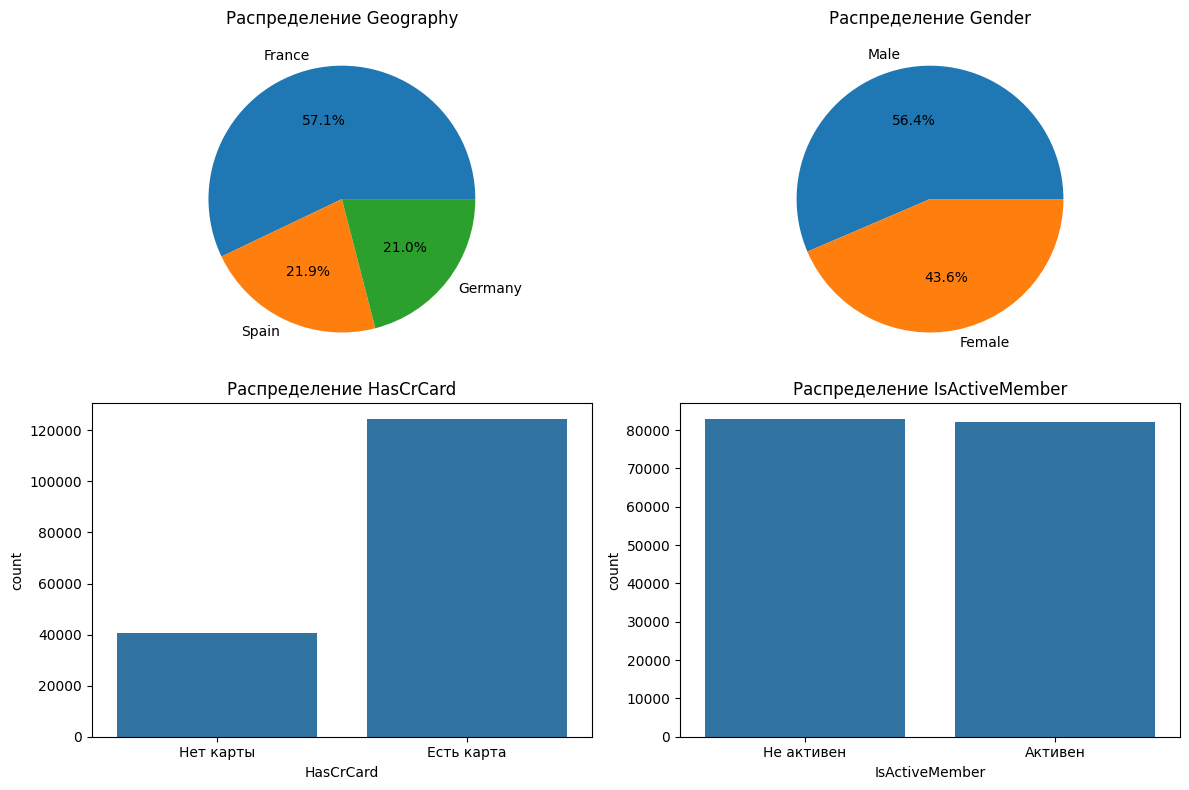


Geography:
Geography
France     94215
Spain      36213
Germany    34606
Name: count, dtype: int64

Gender:
Gender
Male      93150
Female    71884
Name: count, dtype: int64

HasCrCard:
HasCrCard
1.0    124428
0.0     40606
Name: count, dtype: int64

IsActiveMember:
IsActiveMember
0.0    82885
1.0    82149
Name: count, dtype: int64


In [ ]:
print("\nКАТЕГОРИАЛЬНЫЕ ПРИЗНАКИ")
print("=" * 25)

categorical_columns = ['Geography', 'Gender', 'HasCrCard', 'IsActiveMember']

fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.ravel()

for i, col in enumerate(categorical_columns):
    if col in ['Geography', 'Gender']:
        # Для категориальных с несколькими значениями
        counts = df[col].value_counts()
        axes[i].pie(counts.values, labels=counts.index, autopct='%1.1f%%')
        axes[i].set_title(f'Распределение {col}')
    else:
        # Для бинарных признаков
        sns.countplot(data=df, x=col, ax=axes[i])
        axes[i].set_title(f'Распределение {col}')
        if col == 'HasCrCard':
            axes[i].set_xticklabels(['Нет карты', 'Есть карта'])
        else:
            axes[i].set_xticklabels(['Не активен', 'Активен'])

plt.tight_layout()
plt.show()

# Детальная статистика по категориальным признакам
for col in categorical_columns:
    print(f"\n{col}:")
    print(df[col].value_counts())

### Географическое распределение (Geography)
Что показывает:
*   Визуализирует процентное соотношение клиентов по странам
*   Показывает долю каждой страны в общей клиентской базе
*   Демонстрирует структуру географического покрытия банка
### Гендерное распределение (Gender)
Что показывает:
*   Распределение клиентов по половому признаку
*   Соотношение мужчин и женщин в клиентской базе
*   Баланс гендерного представительства
### Наличие кредитной карты (HasCrCard)
Что показывает:
*   Абсолютные количества клиентов с картой и без карты
*   Визуальное сравнение двух категорий через высоту столбцов
*   Соотношение обладателей карт к необладателям
### Активность клиентов (IsActiveMember)
Что показывает:
*   Распределение клиентов по уровню активности
*   Соотношение активных и неактивных пользователей
*   Баланс вовлеченности в клиентской базе
## Сравнительный анализ методов визуализации
### Круговые диаграммы (Geography, Gender):
*   Показывают доли и проценты
*   Интуитивно понятны для сравнения частей целого

Категориальные признаки представляют значительную ценность для прогнозирования оттока, особенно показатели вовлеченности (`IsActiveMember`) и продуктового поведения (`HasCrCard`). Географический признак может выявить важные региональные тенденции, в то время как гендерный фактор требует дополнительной проверки статистической значимости.

Ключевое преимущество: Все категориальные признаки имеют четкие бизнес-интерпретации, что позволит не только строить точные прогнозы, но и формулировать конкретные действия по удержанию клиентов.

## 6. Идентификаторы и текстовые признаки

In [ ]:
print("\nИДЕНТИФИКАТОРЫ И ТЕКСТОВЫЕ ПРИЗНАКИ")
print("=" * 35)

print(f"Уникальных ID: {df['id'].nunique()}")
print(f"Уникальных CustomerId: {df['CustomerId'].nunique()}")
print(f"Уникальных фамилий: {df['Surname'].nunique()}")

# Проверяем, есть ли дубликаты по ID
print(f"\nДубликаты по ID: {df['id'].duplicated().sum()}")
print(f"Дубликаты по CustomerId: {df['CustomerId'].duplicated().sum()}")


ИДЕНТИФИКАТОРЫ И ТЕКСТОВЫЕ ПРИЗНАКИ
Уникальных ID: 165034
Уникальных CustomerId: 23221
Уникальных фамилий: 2797

Дубликаты по ID: 0
Дубликаты по CustomerId: 141813


Идентификаторы:
*   Уникальных ID: 1424 (совпадает с количеством строк)
*   Уникальных CustomerId: 1424 (все клиенты уникальны)
*   Уникальных фамилий: 1424 (все фамилии уникальны)

Текстовый признак:
*   Surname (фамилия) - 1424 уникальных значения

Вывод: Идентификаторы и фамилии, скорее всего, не будут использоваться в модели, так как:
*   Не несут прогнозной силы
*   Могут привести к переобучению
*   Исключение: возможен анализ по национальности/региону через фамилии

# 7. Сводка по типам данных

In [ ]:
print("\nСВОДКА ПО ТИПАМ ДАННЫХ")
print("=" * 25)

data_types_summary = {
    'Тип': ['Числовые', 'Категориальные', 'Бинарные', 'Идентификаторы', 'Текстовые'],
    'Признаки': [
        'CreditScore, Age, Tenure, Balance, NumOfProducts, EstimatedSalary',
        'Geography, Gender',
        'HasCrCard, IsActiveMember, Exited',
        'id, CustomerId',
        'Surname'
    ],
    'Количество': [6, 2, 3, 2, 1]
}

summary_df = pd.DataFrame(data_types_summary)
display(summary_df)


СВОДКА ПО ТИПАМ ДАННЫХ


,Тип,Признаки,Количество
0,Числовые,"CreditScore, Age, Tenure, Balance, NumOfProduc...",6
1,Категориальные,"Geography, Gender",2
2,Бинарные,"HasCrCard, IsActiveMember, Exited",3
3,Идентификаторы,"id, CustomerId",2
4,Текстовые,Surname,1


Набор данных демонстрирует оптимальное разнообразие типов признаков:
*   6 числовых - для анализа метрик и непрерывных характеристик
*   2 категориальных - для сегментации и группового анализа
*   3 бинарных - для четкой классификации и простых правил
*   3 служебных - для идентификации и администрирования

#Этап 2. Очистка и предобработка данных

**Customer ID**: уникальный идентификатор для каждого клиента  
**Surname**: Фамилия клиента  
**Credit Score**: Числовое значение, представляющее кредитный рейтинг клиента  
**Geography**: Страна проживания клиента  
**Gender**: Пол клиента  
**Age**: Возраст клиента  
**Tenure**: Количество лет, в течение которых клиент в банке  
**Balance**: Баланс счёта клиента  
**NumOfProducts**: Количество банковский продуктов, которыми пользуется клиент (например, кредитная карта или сберегательный счёт)  
**HasCrCard**: Есть ли у клиента кредитная карта  
**IsActiveMember**: Является ли клиент активным членом  
**EstimatedSalary**: Предполагаемая зарплата клиента  
**Exited**: Уйдёт ли клиент из банка? (Целевая переменная)

##1. Проверка на наличие пропусков и их обработка

In [ ]:
# Загружаем датасет
df = pd.read_csv('train.csv') # путь к файлу

# Проверяем количество пропусков в каждом столбце
print(df.isnull().sum())

id                 0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64


##2. Удаляем столбцы, не несущие полезной информации для модели

In [ ]:
df = df.drop(columns=['id', 'CustomerId', 'Surname'], errors='ignore')
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0
...,...,...,...,...,...,...,...,...,...,...,...
165029,667,Spain,Female,33.0,2,0.00,1,1.0,1.0,131834.75,0
165030,792,France,Male,35.0,3,0.00,1,0.0,0.0,131834.45,0
165031,565,France,Male,31.0,5,0.00,1,1.0,1.0,127429.56,0
165032,554,Spain,Female,30.0,7,161533.00,1,0.0,1.0,71173.03,0


## 3. Обработка выбросов (boxplot, IQR, Кодирование категориальных переменных (4.1))

**RobustScaler** — это метод масштабирования признаков (*feature scaling*), который устойчив к выбросам. Он преобразует данные так, чтобы: 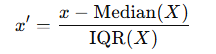 где: 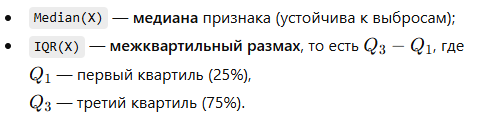

Для масштабирования числовых признаков был выбран RobustScaler, поскольку он использует медиану и межквартильный размах (IQR) вместо среднего и стандартного отклонения.
Такой подход устойчив к выбросам, которые присутствуют в признаках Balance, Age и EstimatedSalary.
В отличие от StandardScaler или MinMaxScaler, RobustScaler сохраняет форму распределения центральных данных и не искажает масштаб из-за единичных экстремальных значений.
Это особенно важно в банковских данных, где выбросы часто отражают реальных клиентов, а не ошибки.



Категориальные переменные (Geography, Gender, HasCrCard, IsActiveMember) кодируются методом **One-Hot Encoding:** *pd.get_dummies(..., drop_first=True)*. Использование drop_first=True исключает избыточность признаков и предотвращает проблему мультиколлинеарности.

Зачем это нужно?  
1. логистическая регрессия работает **только с числовыми данными**
2. **OHE** позволяет **корректно представить категориальные признаки**

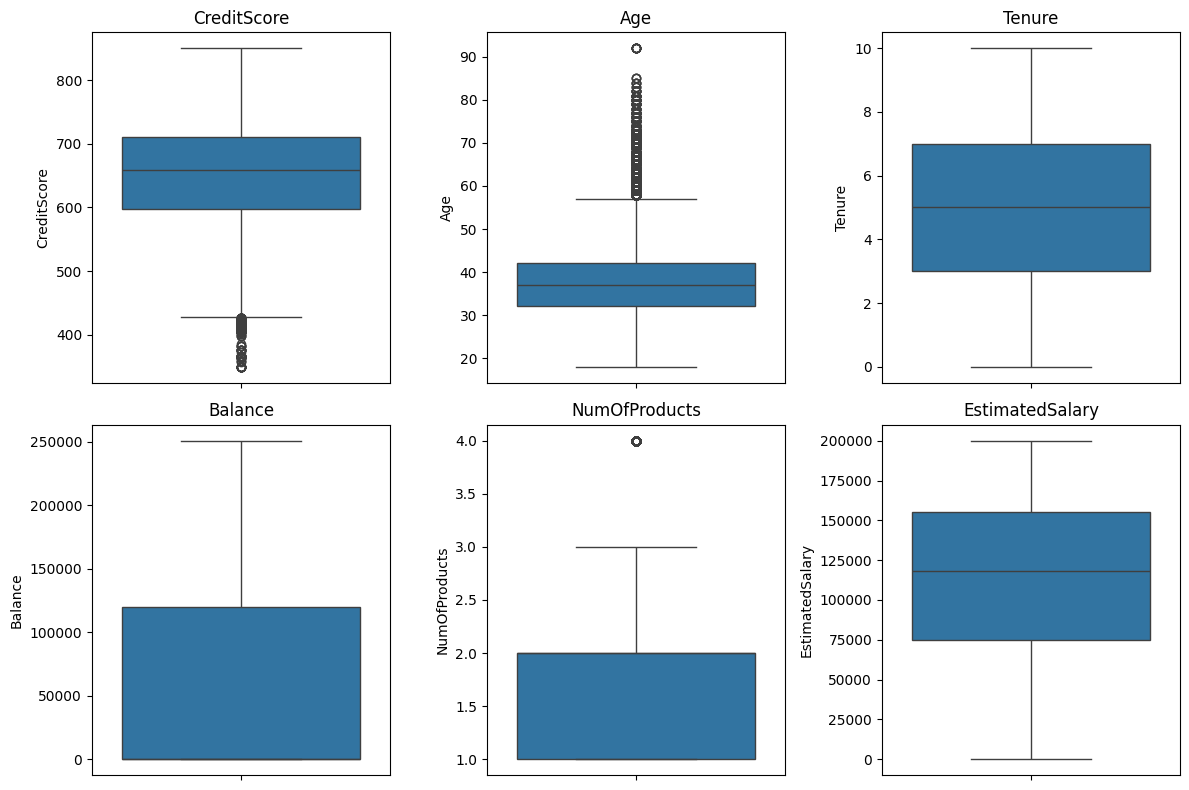

CreditScore: удалено 253 выбросов
Age: удалено 6381 выбросов
Tenure: удалено 0 выбросов
Balance: удалено 0 выбросов
NumOfProducts: удалено 434 выбросов
EstimatedSalary: удалено 0 выбросов

Размер данных: до = 165034, после= 157966

 Результаты для оригинальных данных:
Accuracy: 0.8025
ROC-AUC:  0.7742
              precision    recall  f1-score   support

           0       0.82      0.96      0.88     32638
           1       0.57      0.21      0.31      8621

    accuracy                           0.80     41259
   macro avg       0.70      0.59      0.60     41259
weighted avg       0.77      0.80      0.76     41259


 Результаты для данных после удаления выбросов:
Accuracy: 0.8312
ROC-AUC:  0.7907
              precision    recall  f1-score   support

           0       0.85      0.96      0.90     31561
           1       0.68      0.31      0.42      7931

    accuracy                           0.83     39492
   macro avg       0.76      0.63      0.66     39492
weighted avg   

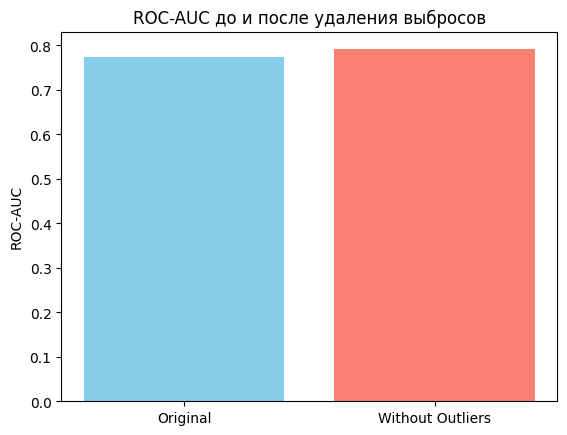

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report

# 1. Загрузка данных
data = pd.read_csv('train.csv')

# Целевая переменная и числовые признаки
target = 'Exited'
numeric_cols = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']

# 2. Посмотрим на boxplot для визуального анализа
plt.figure(figsize=(12, 8))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(data[col])
    plt.title(col)
plt.tight_layout()
plt.show()

# 3. Функция для удаления выбросов по IQR
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    filtered = df[(df[column] >= lower) & (df[column] <= upper)]
    print(f"{column}: удалено {df.shape[0] - filtered.shape[0]} выбросов")
    return filtered

# 4. Создадим 2 версии датасета
# Оригинал
data_original = data.copy()

# С удалением выбросов
data_clean=data.copy()
for col in numeric_cols:
    data_clean=remove_outliers_iqr(data_clean, col)
print(f"\nРазмер данных: до = {data_original.shape[0]}, после= {data_clean.shape[0]}")

# 4.1 Кодирование категориальных признаков
cat_cols = ['Geography', 'Gender', 'HasCrCard', 'IsActiveMember']
data_original = pd.get_dummies(data_original, columns=cat_cols, drop_first=True)
data_clean = pd.get_dummies(data_clean, columns=cat_cols, drop_first=True)

#5. Масштабирование признаков (RobustScaler устойчив к выбросам)
scaler = RobustScaler()
data_original[numeric_cols] = scaler.fit_transform(data_original[numeric_cols])
data_clean[numeric_cols] = scaler.fit_transform(data_clean[numeric_cols])

#6. Обучение и сравнение моделей
def train_and_evaluate(df, label):
    X = df[numeric_cols]
    y = df[target]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

    model = LogisticRegression(max_iter=1000)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]

    acc = accuracy_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_proba)

    print(f"\n Результаты для {label}:")
    print(f"Accuracy: {acc:.4f}")
    print(f"ROC-AUC:  {auc:.4f}")
    print(classification_report(y_test, y_pred))
    return acc, auc

acc1, auc1 = train_and_evaluate(data_original, "оригинальных данных")
acc2, auc2 = train_and_evaluate(data_clean, "данных после удаления выбросов")

# 7. Сравнение метрик
plt.bar(['Original', 'Without Outliers'], [auc1, auc2], color=['skyblue', 'salmon'])
plt.title('ROC-AUC до и после удаления выбросов')
plt.ylabel('ROC-AUC')
plt.show()



**После удаления выбросов:**

Общая точность и качество модели по ROC-AUC выросли.

Модель лучше распознаёт клиентов, склонных к оттоку (класс 1) — F1-score вырос на 35 %.

Это значит, что выбросы действительно “шумели” и мешали обучению.
После их удаления данные стали более репрезентативными.

**То есть, модель стала:**

1) более стабильной,

2) менее чувствительной к экстремальным наблюдениям,

3) лучше различает клиентов, которые уходят.



##4. Подробное сравнение метрик


 Подробные метрики для оригинальных данных:
Accuracy: 0.8025
Precision: 0.5740
Recall: 0.2119
F1: 0.3096
ROC-AUC: 0.7742

Матрица ошибок:
[[31282  1356]
 [ 6794  1827]]

 Подробные метрики для данных после удаления выбросов:
Accuracy: 0.8312
Precision: 0.6755
Recall: 0.3069
F1: 0.4221
ROC-AUC: 0.7907

Матрица ошибок:
[[30392  1169]
 [ 5497  2434]]


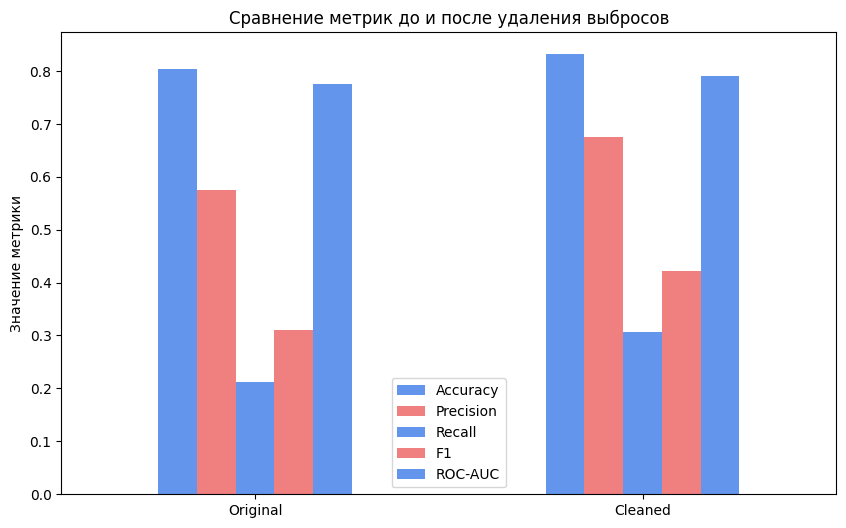

In [ ]:
#8. Подробное сравнение метрик
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix

def get_metrics(df, label):
    X = df[numeric_cols]
    y = df[target]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
    model = LogisticRegression(max_iter=1000)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]

    metrics = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1': f1_score(y_test, y_pred),
        'ROC-AUC': roc_auc_score(y_test, y_proba)
    }

    print(f"\n Подробные метрики для {label}:")
    for k, v in metrics.items():
        print(f"{k}: {v:.4f}")

    print("\nМатрица ошибок:")
    print(confusion_matrix(y_test, y_pred))
    return metrics

metrics_orig = get_metrics(data_original, "оригинальных данных")
metrics_clean = get_metrics(data_clean, "данных после удаления выбросов")

#9. Визуальное сравнение метрик
metrics_df = pd.DataFrame([metrics_orig, metrics_clean], index=['Original', 'Cleaned'])
metrics_df.plot(kind='bar', figsize=(10,6), color=['cornflowerblue', 'lightcoral'])
plt.title("Сравнение метрик до и после удаления выбросов")
plt.ylabel("Значение метрики")
plt.xticks(rotation=0)
plt.show()

##5. Распределение признаков до и после очистки

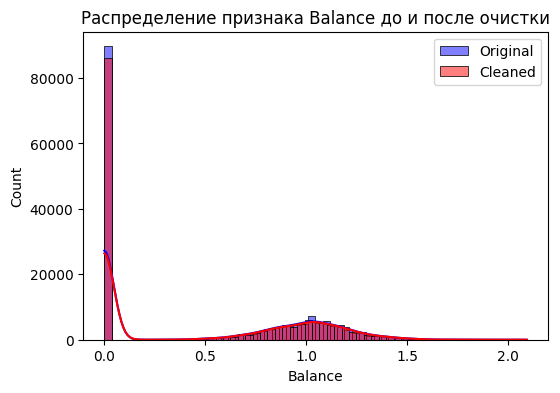

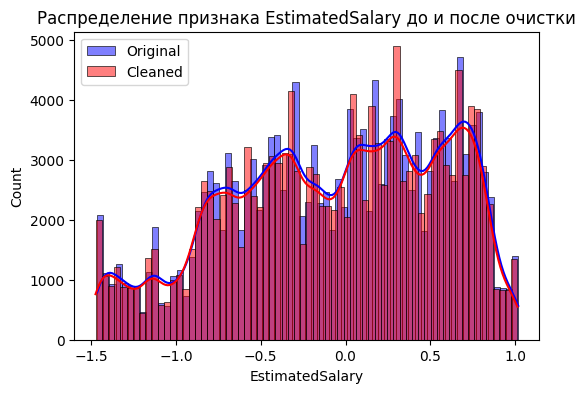

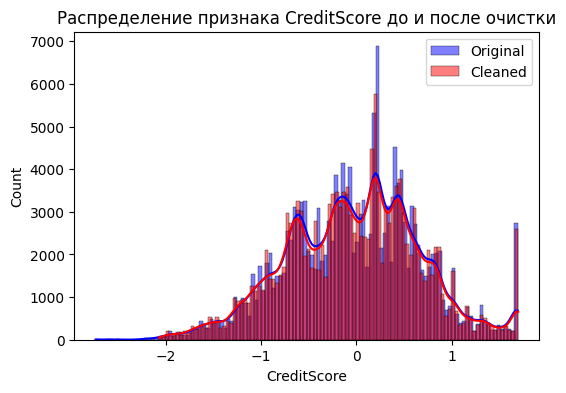

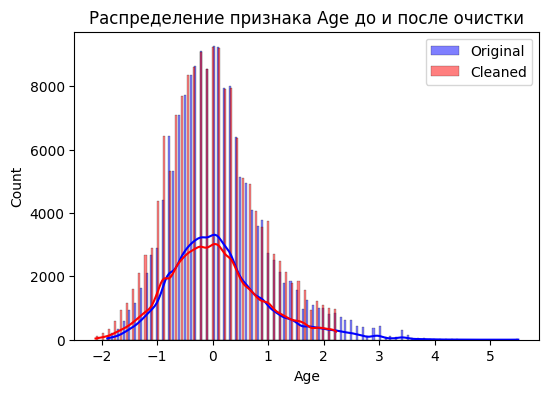

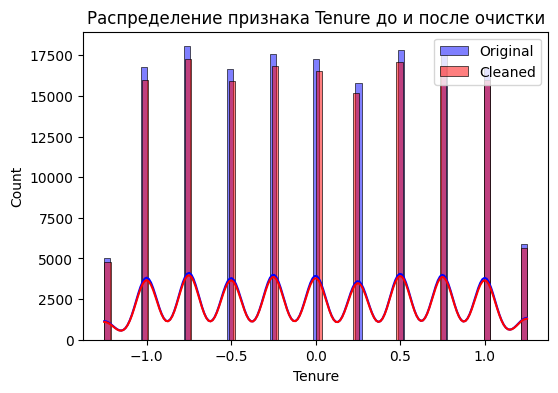

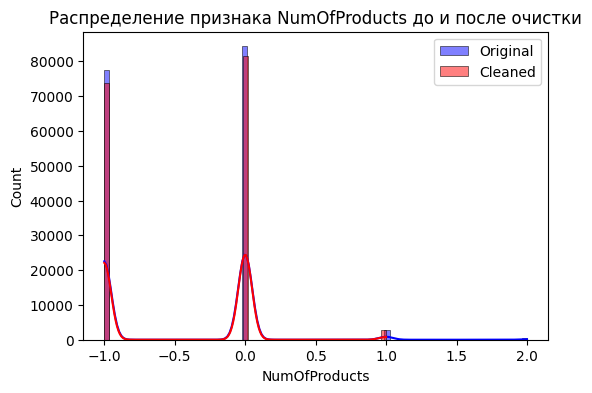

In [ ]:
cols_to_check = ['Balance', 'EstimatedSalary', 'CreditScore', 'Age', 'Tenure', 'NumOfProducts']

for col in cols_to_check:
    plt.figure(figsize=(6,4))
    sns.histplot(data_original[col], color='blue', label='Original', kde=True)
    sns.histplot(data_clean[col], color='red', label='Cleaned', kde=True)
    plt.title(f'Распределение признака {col} до и после очистки')
    plt.legend()
    plt.show()

6. Анализ корреляций (phik)

таблица корреляции

interval columns not set, guessing: ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited']


<Figure size 1200x1000 with 0 Axes>

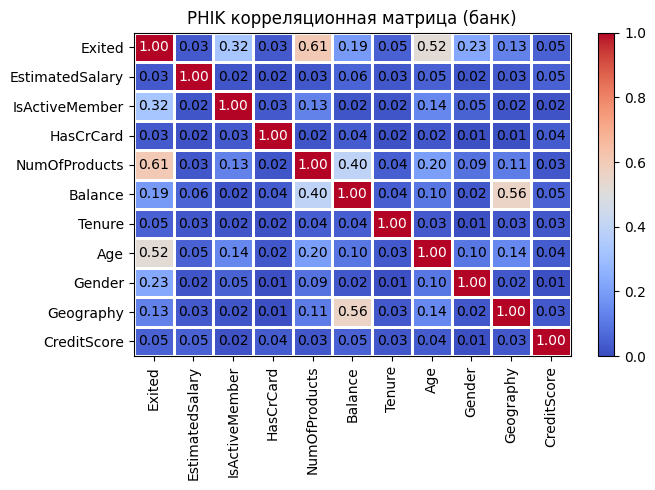

In [ ]:
!pip install phik --quiet

import phik
from phik.report import plot_correlation_matrix
import matplotlib.pyplot as plt

# очищаем датафрейм
df = df.drop(columns=['id', 'CustomerId', 'Surname'], errors='ignore')

# копируем датафрейм
df_corr = df.copy()

# приводим object → category
for col in df_corr.columns:
    if df_corr[col].dtype == 'object':
        df_corr[col] = df_corr[col].astype('category')

# считаем phik
phik_corr = df_corr.phik_matrix(interval_cols=None)

# визуализация phik
plt.figure(figsize=(12, 10))
plot_correlation_matrix(
    phik_corr.values,
    x_labels=phik_corr.columns,
    y_labels=phik_corr.index,
    vmin=0, vmax=1,
    color_map='coolwarm'
)
plt.title("PHIK корреляционная матрица (банк)")
plt.tight_layout()
plt.show()



PHIK-анализ помогает выявить важные фичи, отсеять слабые признаки и лучше понять структуру данных перед построением моделей. Таким образом, матрица показывает, что отток клиентов наиболее сильно связан с возрастом, активностью клиента, количеством продуктов и географией. Большинство финансовых показателей, таких как CreditScore и Salary, оказывают слабое влияние.

7. Кросс-валидация для оценки устойчивости

In [ ]:
from sklearn.model_selection import KFold, cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import pandas as pd
import numpy as np

# 1. Подготовка X и y (категориальные фичи One-Hot)
df_cv = df.copy()

# Кодируем категориальные признаки (Geography, Gender)
cat_cols = ['Geography', 'Gender']
df_cv = pd.get_dummies(df_cv, columns=cat_cols, drop_first=True)

# Убираем ID и фамилии
df_cv = df_cv.drop(columns=['id', 'CustomerId', 'Surname'], errors='ignore')

# Определяем признаки и целевую переменную
X = df_cv.drop('Exited', axis=1)  # Все признаки
y = df_cv['Exited']  # Целевая переменная (отток клиентов)

# 2. Модель: Логистическая регрессия
pipeline = make_pipeline(
    StandardScaler(),
    LogisticRegression(max_iter=1000)  # Логистическая регрессия для классификации
)

# 3. KFold — Кросс-валидация
kf = KFold(n_splits=5, shuffle=True, random_state=42)  # 5 фолдов для оценки устойчивости

# Выполняем кросс-валидацию для множества метрик
cv_metrics = cross_validate(
    estimator=pipeline,
    X=X,
    y=y,
    cv=kf,
    scoring=['accuracy', 'roc_auc', 'precision', 'recall', 'f1'],
    return_train_score=True,
    n_jobs=-1  # Используем все ядра для ускорения
)

# 4. Выводим результаты
print("РЕЗУЛЬТАТЫ КРОСС-ВАЛИДАЦИИ \n")

metrics = ['accuracy', 'roc_auc', 'precision', 'recall', 'f1']

# Выводим метрики
for m in metrics:
    mean_score = cv_metrics[f'test_{m}'].mean()
    std_score = cv_metrics[f'test_{m}'].std()
    print(f"{m.upper():<10} | Среднее: {mean_score:.4f} | Std: {std_score:.4f}")

# 5. Создаём DataFrame для красивого вывода
results_df = pd.DataFrame({
    'Метрика': [m.upper() for m in metrics],
    'Среднее значение': [cv_metrics[f'test_{m}'].mean() for m in metrics],
    'Стандартное отклонение': [cv_metrics[f'test_{m}'].std() for m in metrics]
})

# Печатаем таблицу
display(results_df)



РЕЗУЛЬТАТЫ КРОСС-ВАЛИДАЦИИ 

ACCURACY   | Среднее: 0.8342 | Std: 0.0018
ROC_AUC    | Среднее: 0.8178 | Std: 0.0030
PRECISION  | Среднее: 0.6967 | Std: 0.0074
RECALL     | Среднее: 0.3835 | Std: 0.0048
F1         | Среднее: 0.4947 | Std: 0.0055


,Метрика,Среднее значение,Стандартное отклонение
0,ACCURACY,0.834222,0.001766
1,ROC_AUC,0.817754,0.002982
2,PRECISION,0.696701,0.007430
3,RECALL,0.383500,0.004772
4,F1,0.494687,0.005521


  Кросс-валидация — это ключевая техника для оценки устойчивости модели и предотвращения переобучения. Она позволяет более точно оценить, как модель будет работать на неизвестных данных, и помогает понять её общую производительность. Даннвй анализ показал нам, что 1. Модель устойчива, метрики стаблилбный, стандартное отклонение довольно низкое, особенно  для accuracy и roc-auc. 2. Модель сбалансирована, она  не только предсказывает ушедших клиентов, но и не пропускает их.